In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.utils import shuffle
from scipy.stats import gmean
from sklearn.preprocessing import StandardScaler

# Load your dataset
df = pd.read_csv('weather.csv')

# Define features (x) and target variable (y)
y = df['weather']
columns_to_drop = ['weather', 'date']
x = df.drop(columns=columns_to_drop, axis=1)

# Shuffle the data (optional but recommended)
x, y = shuffle(x, y, random_state=42)

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)

# Standardize the data
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Create Logistic Regression model
logreg_classifier = LogisticRegression(max_iter=1000, random_state=42)

# Train the model
logreg_classifier.fit(x_train_scaled, y_train)

# Make predictions on the training and testing sets
y_logreg_train_pred = logreg_classifier.predict(x_train_scaled)
y_logreg_test_pred = logreg_classifier.predict(x_test_scaled)

# Calculate accuracy
logreg_train_accuracy = accuracy_score(y_train, y_logreg_train_pred)
logreg_test_accuracy = accuracy_score(y_test, y_logreg_test_pred)

# Calculate confusion matrix
cm_train_logreg = confusion_matrix(y_train, y_logreg_train_pred)
cm_test_logreg = confusion_matrix(y_test, y_logreg_test_pred)

# Calculate precision, recall, F1-score
precision_train_logreg = precision_score(y_train, y_logreg_train_pred, average='weighted', zero_division=1)
precision_test_logreg = precision_score(y_test, y_logreg_test_pred, average='weighted', zero_division=1)

recall_train_logreg = recall_score(y_train, y_logreg_train_pred, average='weighted', zero_division=1)
recall_test_logreg = recall_score(y_test, y_logreg_test_pred, average='weighted', zero_division=1)

f1_train_logreg = f1_score(y_train, y_logreg_train_pred, average='weighted', zero_division=1)
f1_test_logreg = f1_score(y_test, y_logreg_test_pred, average='weighted', zero_division=1)

# Calculate gmean
gmean_train_logreg = gmean([recall_train_logreg, precision_train_logreg])
gmean_test_logreg = gmean([recall_test_logreg, precision_test_logreg])

# Print results
print(f'Training Accuracy (Logistic Regression): {logreg_train_accuracy:.4f}')
print(f'Test Accuracy (Logistic Regression): {logreg_test_accuracy:.4f}')

print(f'Training Precision (Logistic Regression): {precision_train_logreg:.4f}')
print(f'Test Precision (Logistic Regression): {precision_test_logreg:.4f}')

print(f'Training Recall (Logistic Regression): {recall_train_logreg:.4f}')
print(f'Test Recall (Logistic Regression): {recall_test_logreg:.4f}')

print(f'Training F1 Score (Logistic Regression): {f1_train_logreg:.4f}')
print(f'Test F1 Score (Logistic Regression): {f1_test_logreg:.4f}')

print(f'Training G-Mean (Logistic Regression): {gmean_train_logreg:.4f}')
print(f'Test G-Mean (Logistic Regression): {gmean_test_logreg:.4f}')

Training Accuracy (Logistic Regression): 0.7842
Test Accuracy (Logistic Regression): 0.7952
Training Precision (Logistic Regression): 0.8144
Test Precision (Logistic Regression): 0.8247
Training Recall (Logistic Regression): 0.7842
Test Recall (Logistic Regression): 0.7952
Training F1 Score (Logistic Regression): 0.7354
Test F1 Score (Logistic Regression): 0.7572
Training G-Mean (Logistic Regression): 0.7992
Test G-Mean (Logistic Regression): 0.8098


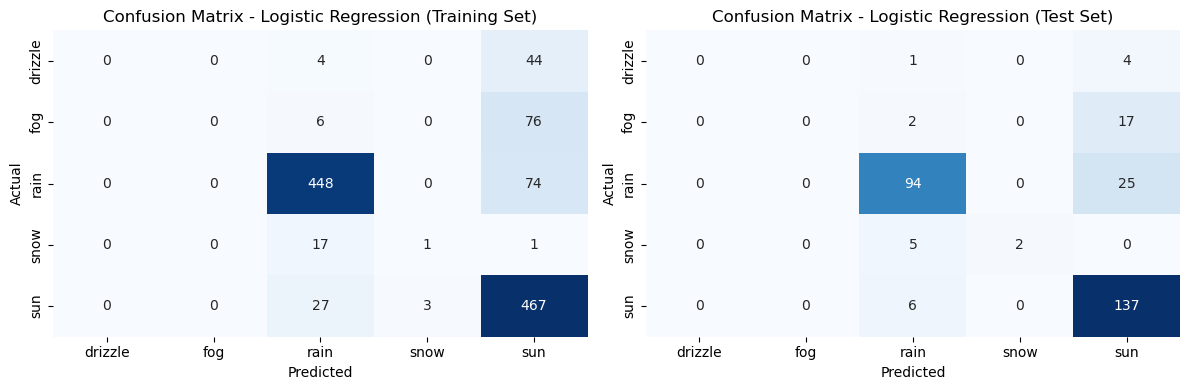

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot confusion matrices
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.heatmap(cm_train_logreg, annot=True, fmt='g', cmap='Blues', cbar=False,
            xticklabels=logreg_classifier.classes_, yticklabels=logreg_classifier.classes_)
plt.title('Confusion Matrix - Logistic Regression (Training Set)')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.subplot(1, 2, 2)
sns.heatmap(cm_test_logreg, annot=True, fmt='g', cmap='Blues', cbar=False,
            xticklabels=logreg_classifier.classes_, yticklabels=logreg_classifier.classes_)
plt.title('Confusion Matrix - Logistic Regression (Test Set)')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()
